## Contexte

Ce projet rentre dans la formation "Artificial Intelligence for robotics with Python" proposée par Micro Club. A travers ce court projet vous aurez à revoir les principes de classification utilisant des méthodes de Machine Learning classique comme vus durant la séance 3. 

Ce projet se base sur ce [dataset](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification) donnant les données CTG (cardiotocogramme) pour définir les taux de risques de maladie de foetus, donc l'objectif est de classer les différents cas en trois catégories : 
- Normal : 1
- Suspect : 2
- Malade : 3

Ainsi ce genre de projet vous permettra de vous entraîner sur de vrais problématiques. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Pour tester les performances des modèles utilisés
from sklearn import metrics

## Importation des modèles de Machine Learning

Importez les modèles que vous voulez évaluer sur cette problématique à partir de la librairie scikit-learn. Voici la documentation officielle : [Documentation](https://scikit-learn.org/stable/supervised_learning.html)

Choisissez 4 modèles à évaluer.

In [2]:
# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


## Importation des données

Importer le fichier "fetal_health.csv" proposé avec ce challenge en utilisant Pandas

In [3]:
fetal_health = pd.read_csv("./data/fetal_health.csv")
fetal_health.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [10]:
fetal_health

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

## Analyse des données

Utilisant Pandas veuillez faire une analyse rapide des données : 
- Faire une description globale des données (describe)
- Expliquez si on a besoin ou pas d'une normalisation des données
- Indiquer si on a des valeurs manquante ou pas
- Indiquer la distribution (ou le nombre d'échantillon par classe) des différentes classes qu'on a (colonne : fetal_health)
- Voyez la corrélation entre les différentes features qu'on a

In [4]:
fetal_health.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

yes and no

In [6]:
fetal_health.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

We can see that there are no missing values in our dataset

In [7]:
fetal_health['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

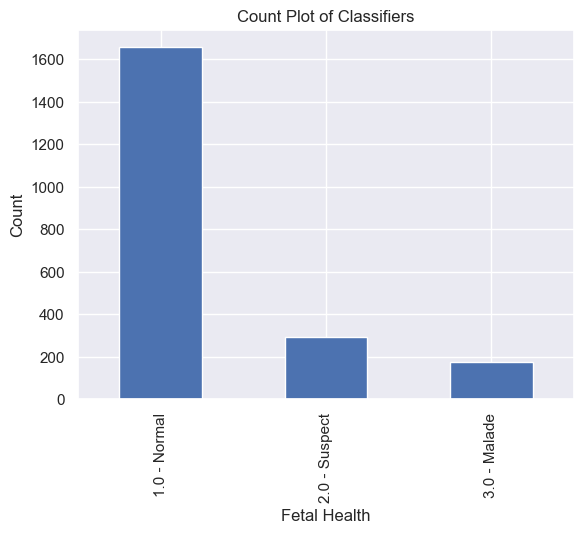

In [54]:

fetal_health['fetal_health'].value_counts().plot.bar()
plt.xticks(ticks=[0, 1, 2], labels=['1.0 - Normal', '2.0 - Suspect', '3.0 - Malade'])
plt.title('Count Plot of Classifiers')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()


We can see that the 3 classes are unbalanced such that the distribution is as follows: 
- 1.0 (Normale) : 1655
- 2.0 (Suspect): 295
- 3.0 (Malade) : 176

On va maintenant passer à une rapide visualisation des données. On commence par observer la distribution des différentes variables 

In [9]:
columns_fetal =fetal_health.copy()
columns_fetal.drop(['fetal_health'],axis=1,inplace=True)
columns =list(columns_fetal)
columns

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

In [12]:
fetal_health['fetal_movement'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Name: fetal_movement, Length: 2126, dtype: bool

In [19]:
columns_fetal.corr()

baseline value  \
baseline value                                            1.000000   
accelerations                                            -0.080560   
fetal_movement                                           -0.033436   
uterine_contractions                                     -0.146373   
light_decelerations                                      -0.159032   
severe_decelerations                                     -0.053518   
prolongued_decelerations                                 -0.104597   
abnormal_short_term_variability                           0.305570   
mean_value_of_short_term_variability                     -0.279607   
percentage_of_time_with_abnormal_long_term_vari...        0.285630   
mean_value_of_long_term_variability                      -0.032091   
histogram_width                                          -0.147679   
histogram_min                                             0.361619   
histogram_max                                             0.275110   
histogram_number_of_peaks                                -0.113933   
histogram_number_of_zeroes                               -0.004745   
histogram_mode                                            0.708993   
histogram_mean                                            0.723121   
histogram_median                                          0.789246   
histogram_variance                                       -0.133938   
histogram_tendency                                        0.293503   

                                                    accelerations  \
baseline value                                          -0.080560   
accelerations                                            1.000000   
fetal_movement                                           0.048235   
uterine_contractions                                     0.089674   
light_decelerations                                     -0.108615   
severe_decelerations                                    -0.043018   
prolongued_decelerations                                -0.127749   
abnormal_short_term_variability                         -0.279577   
mean_value_of_short_term_variability                     0.207170   
percentage_of_time_with_abnormal_long_term_vari...      -0.373943   
mean_value_of_long_term_variability                     -0.142363   
histogram_width                                          0.298631   
histogram_min                                           -0.154286   
histogram_max                                            0.394147   
histogram_number_of_peaks                                0.190452   
histogram_number_of_zeroes                              -0.006147   
histogram_mode                                           0.243610   
histogram_mean                                           0.270334   
histogram_median                                         0.272849   
histogram_variance                                       0.125704   
histogram_tendency                                       0.028420   

                                                    fetal_movement  \
baseline value                                           -0.033436   
accelerations                                             0.048235   
fetal_movement                                            1.000000   
uterine_contractions                                     -0.068779   
light_decelerations                                       0.049228   
severe_decelerations                                     -0.010976   
prolongued_decelerations                                  0.265922   
abnormal_short_term_variability                          -0.103715   
mean_value_of_short_term_variability                      0.121314   
percentage_of_time_with_abnormal_long_term_vari...       -0.074096   
mean_value_of_long_term_variability                       0.011047   
histogram_width                                           0.162790   
histogram_min                                            -0.153917   
histogram_ma

## Visualisation des données

Utilisant matplotlib et Seaborn : 
- Faites une visualisation de la matrice de corrélation précédemment réalisée et commentez la
- Faites une visualisation des différentes distributions et relations entre les variables utilisant seaborn (pairplot) par rapport à chaque classe
- Faites un ensemble de visualisations sur les données (faites celles que vous jugez pertinentes)

<Axes: >

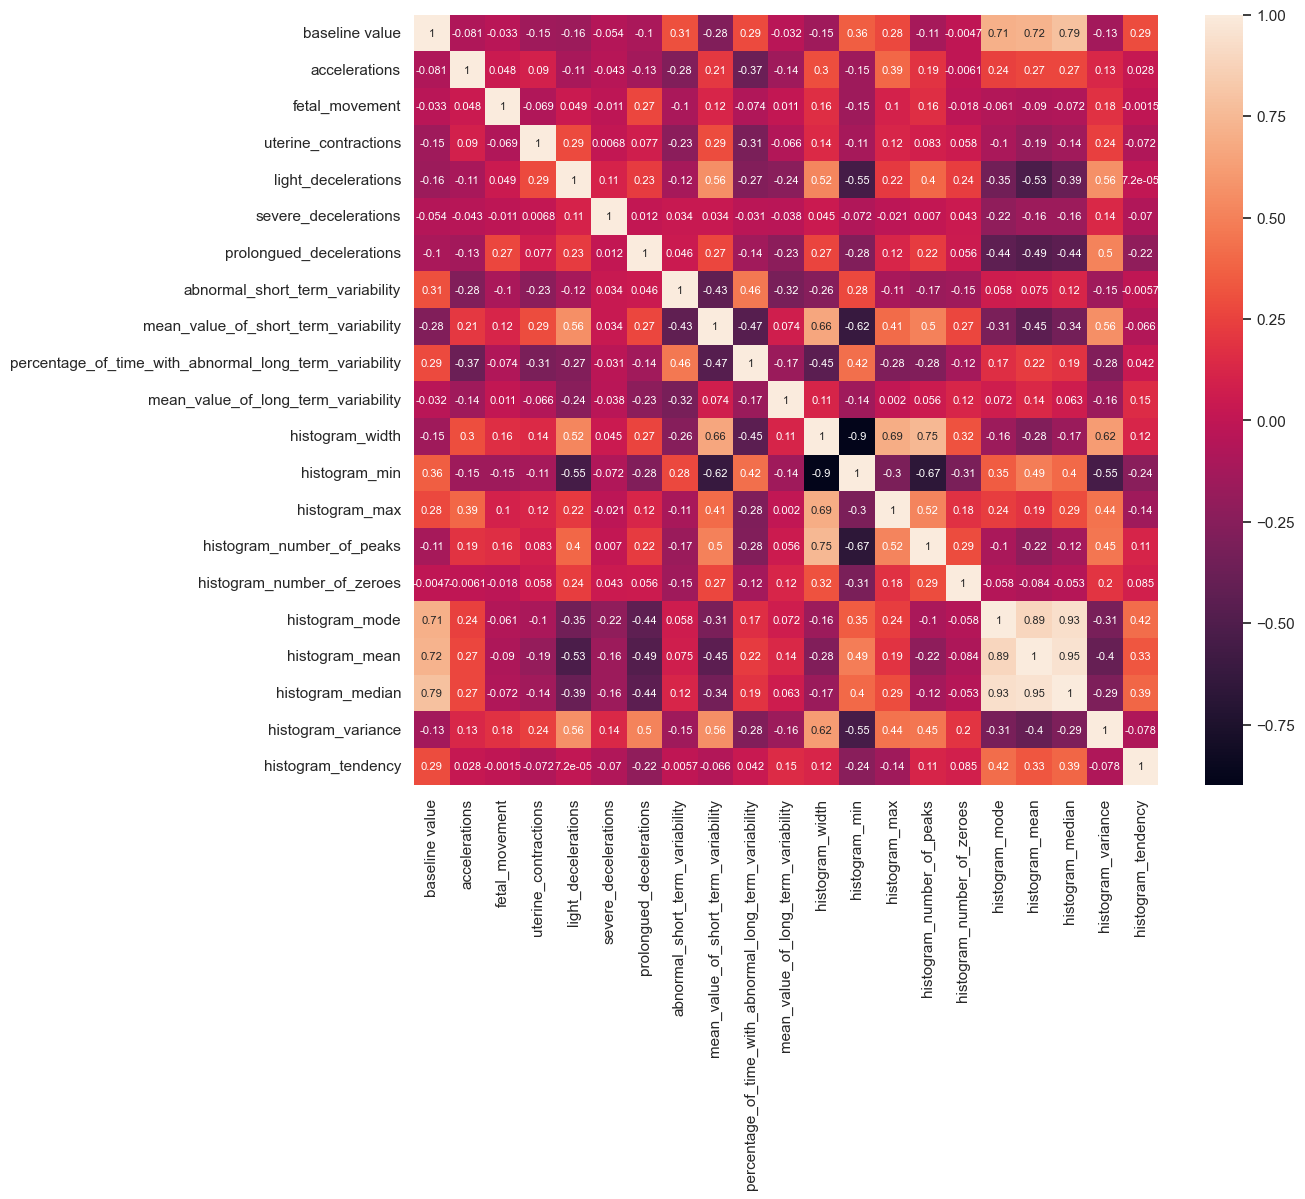

In [84]:
plt.figure(figsize=(12,10))

sns.heatmap(columns_fetal.corr(),annot=True,annot_kws={'fontsize':8})

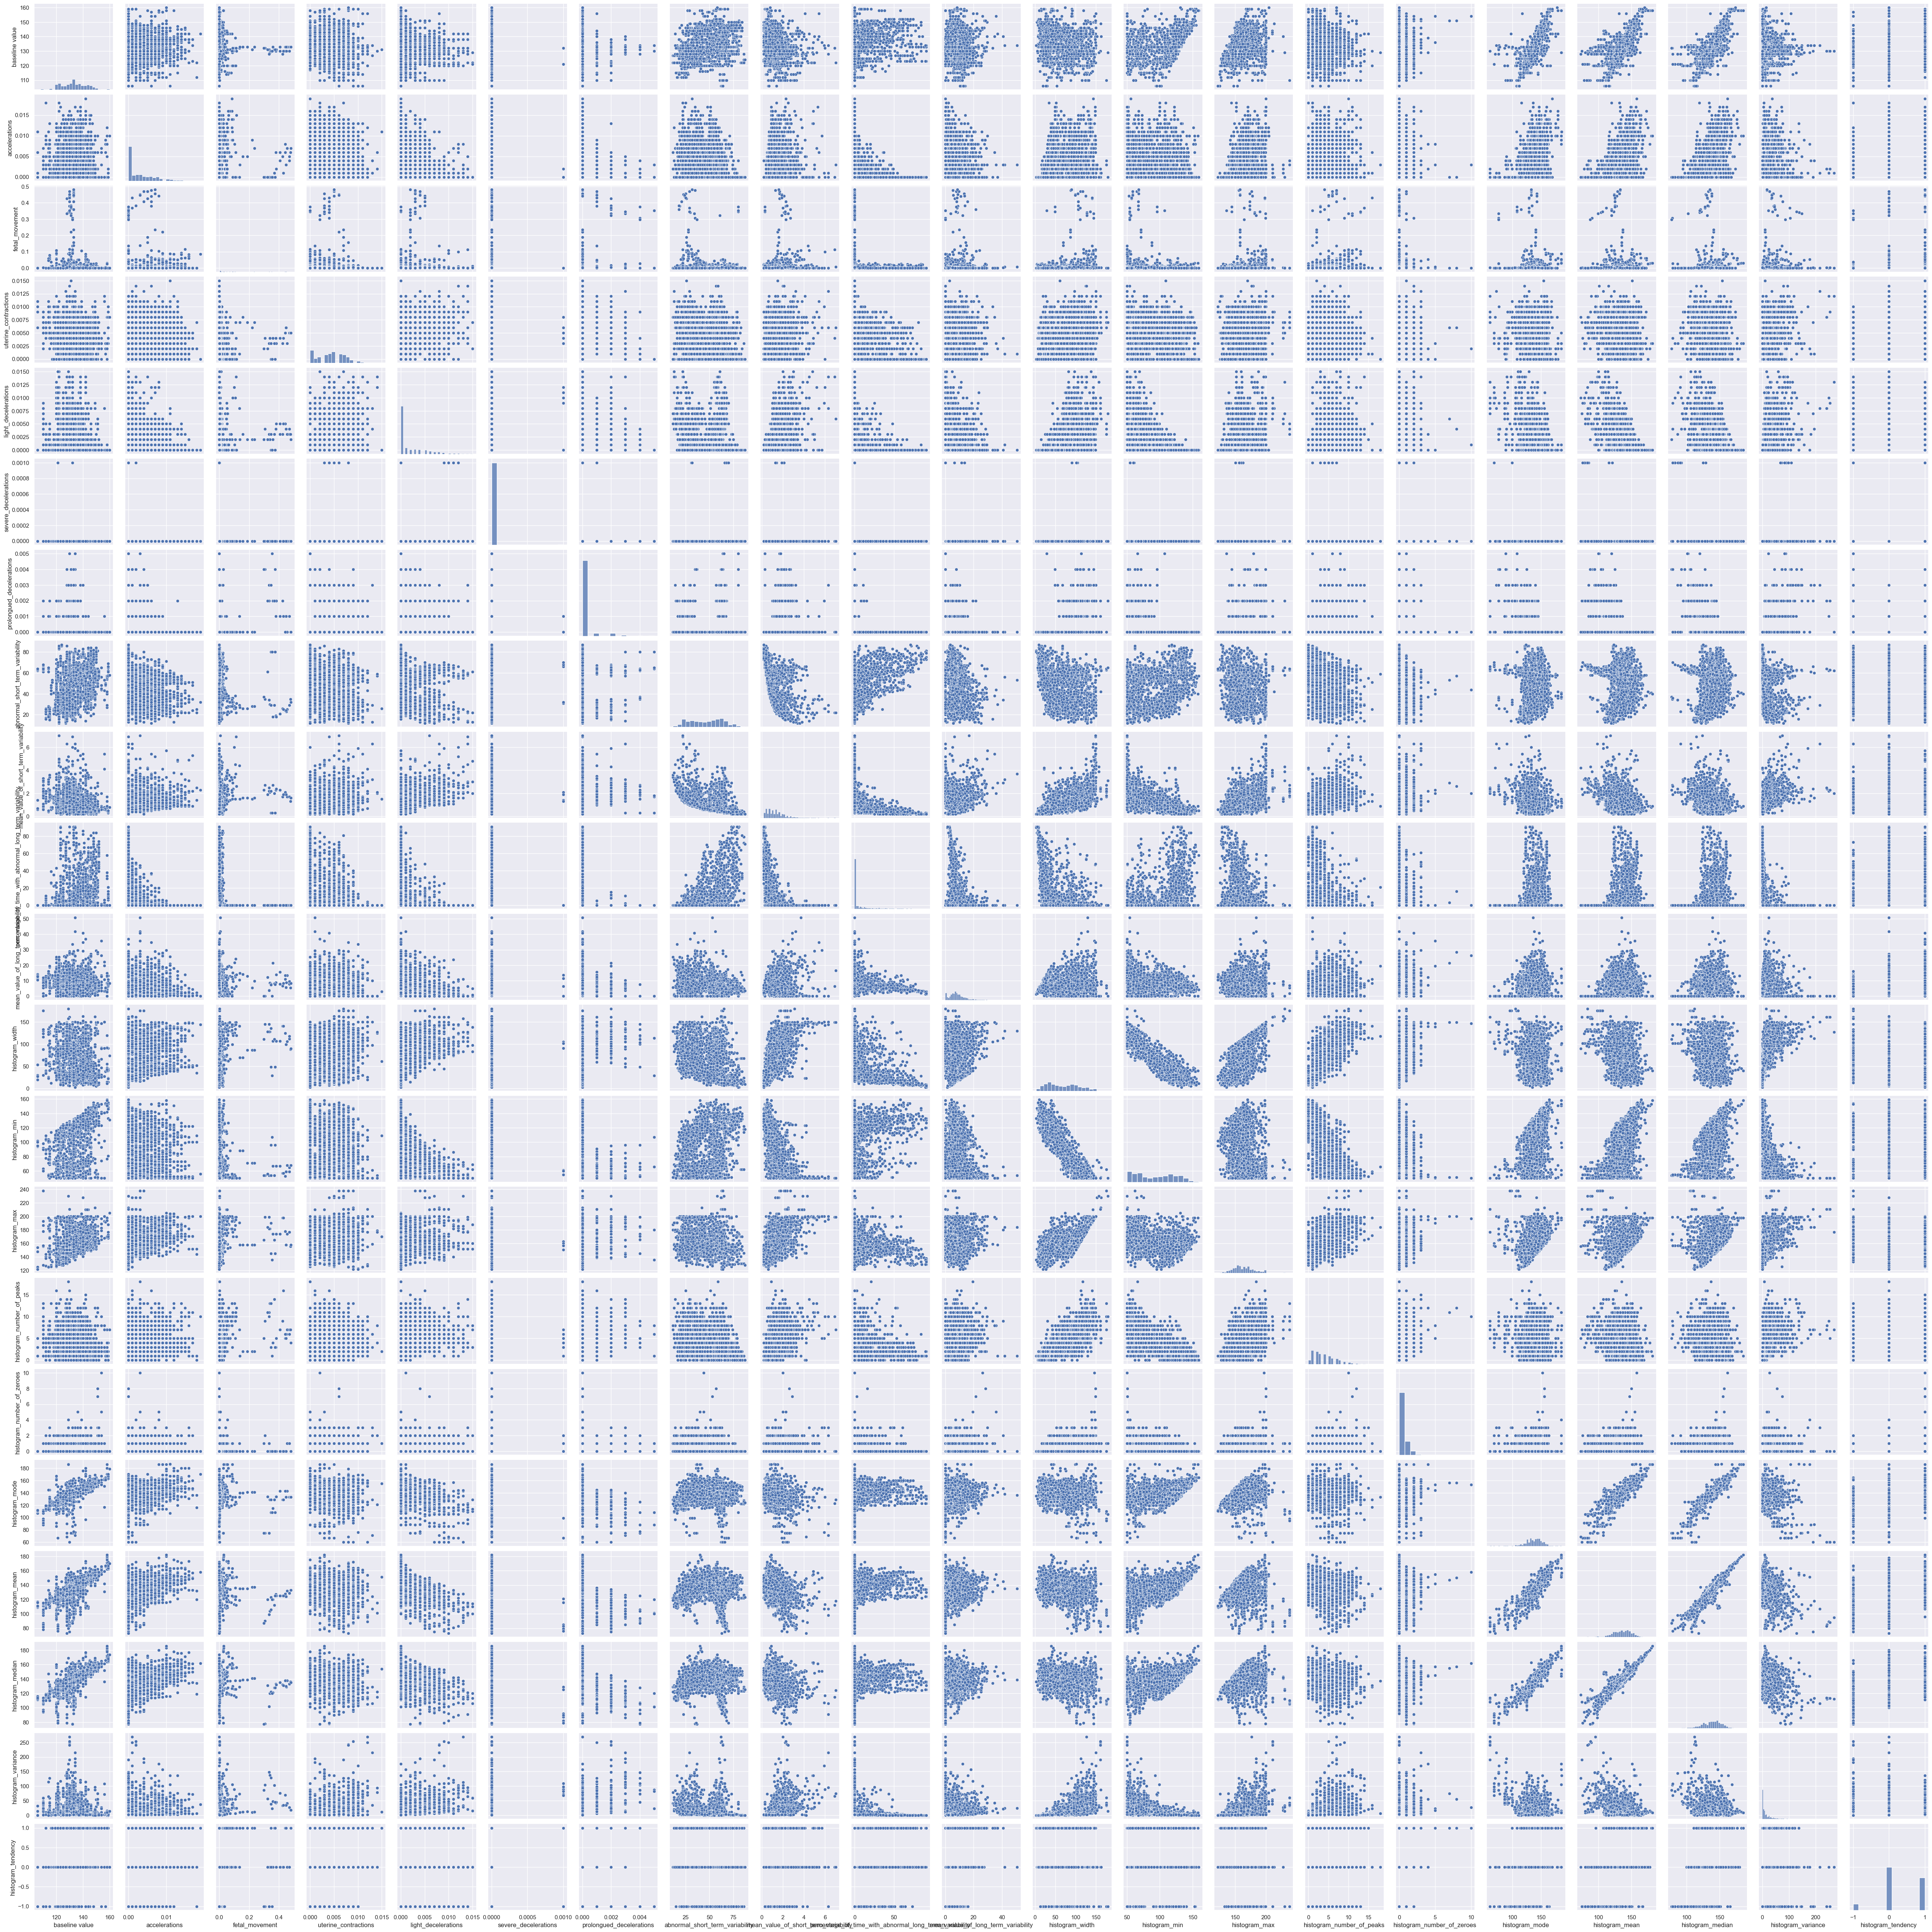

In [56]:
sns.pairplot(fetal_health)

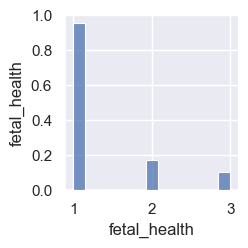

In [40]:
sns.pairplot(fetal_health[['fetal_health']])

## data distribution with Box Plots :

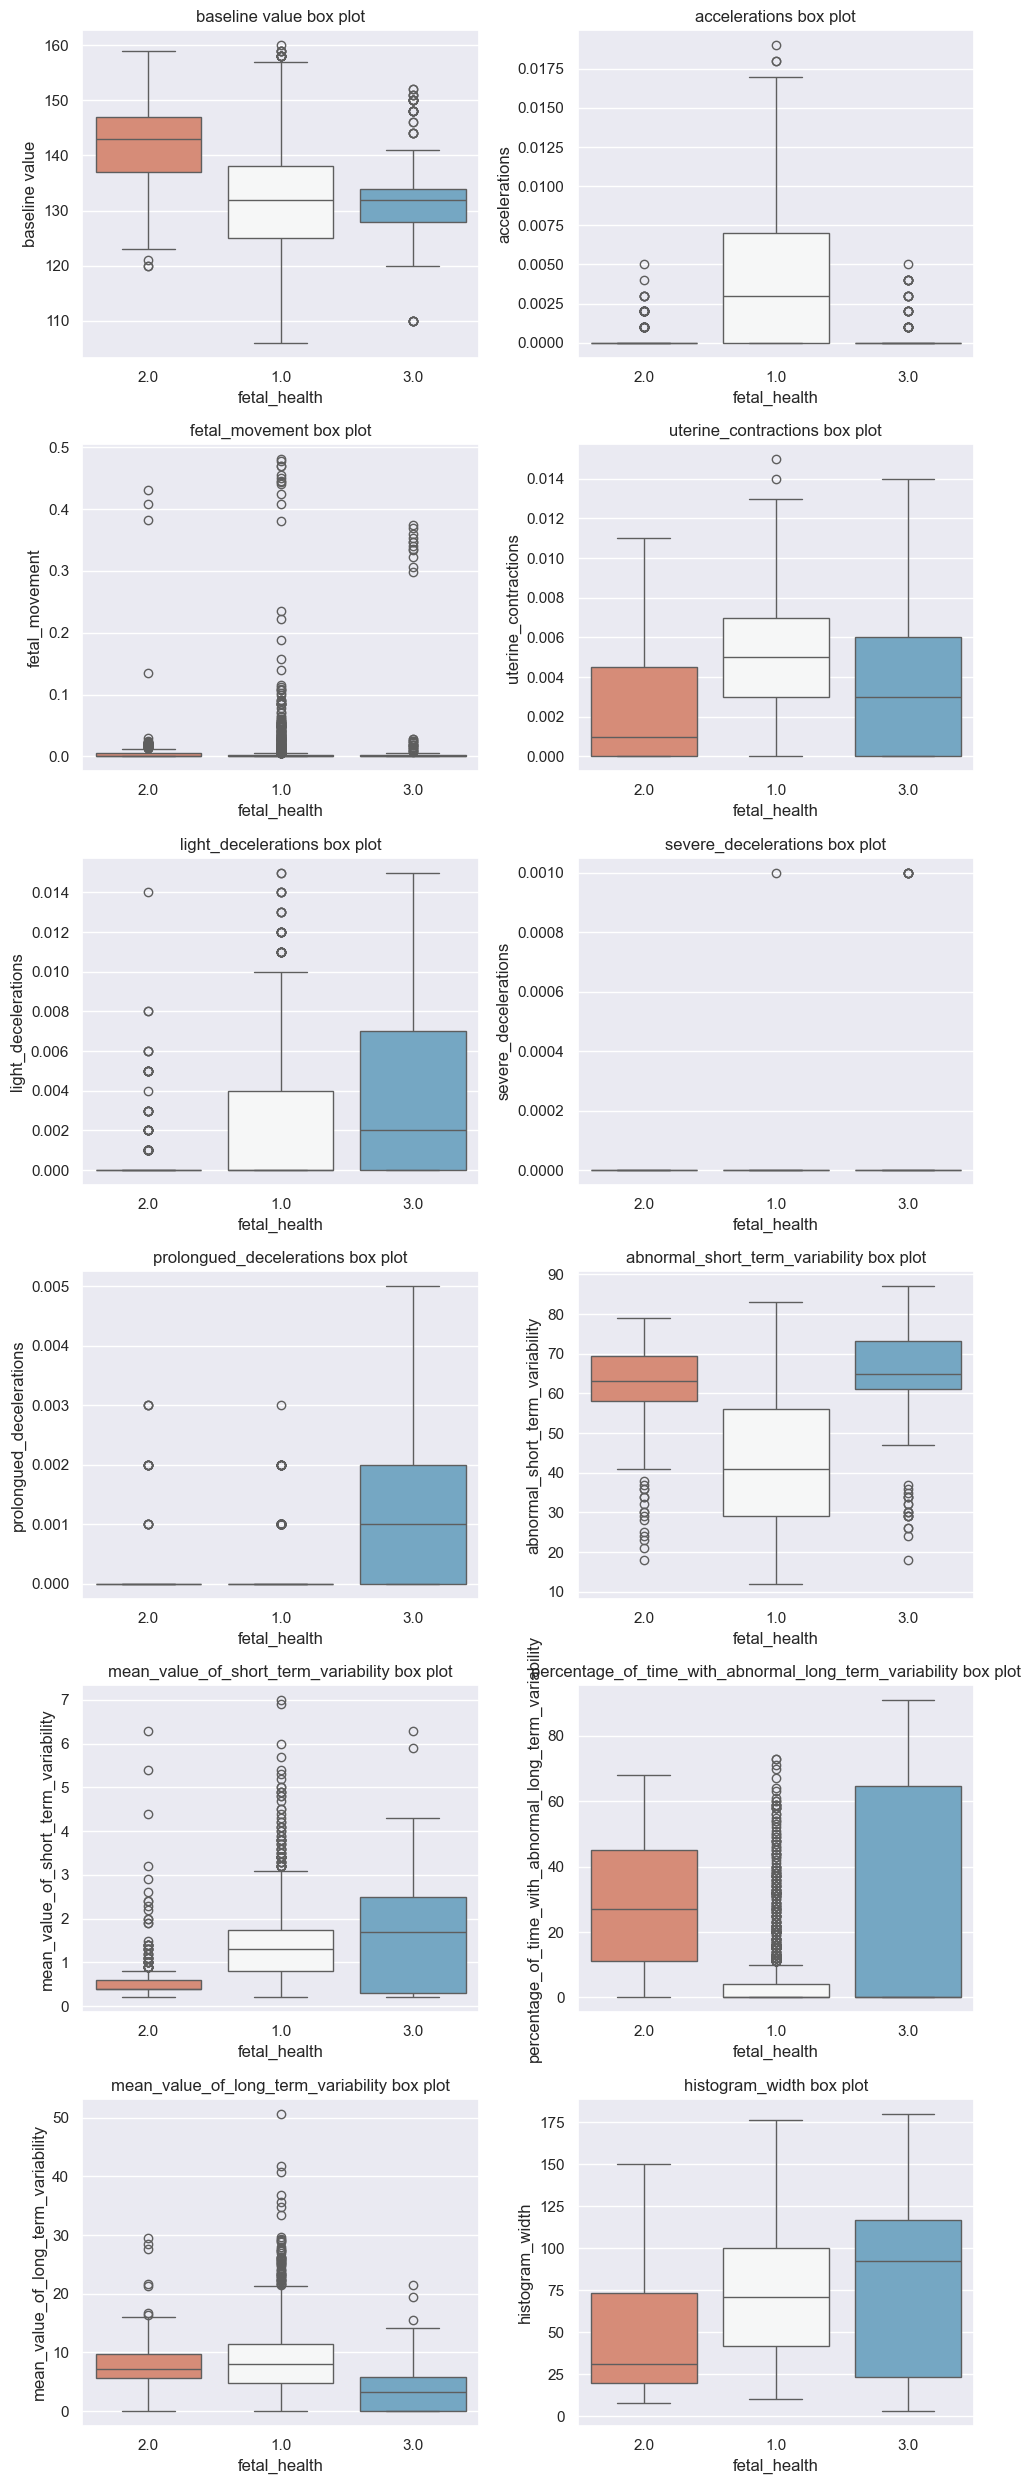

In [67]:
fig = plt.figure(figsize=(10,25))
axes = fig.subplots(6,2)
columns1 =fetal_health.columns.values
i=0
for raw in range(6):
    for col in range(2):
        sns.boxplot(x=fetal_health['fetal_health'],y=fetal_health[columns1[i]],data=fetal_health,ax=axes[raw,col],hue='fetal_health',palette='RdBu')
        axes[raw,col].set_title(f'{columns1[i]} box plot')
        i+=1
fig.tight_layout()
plt.show()

## data distribution with histograms :

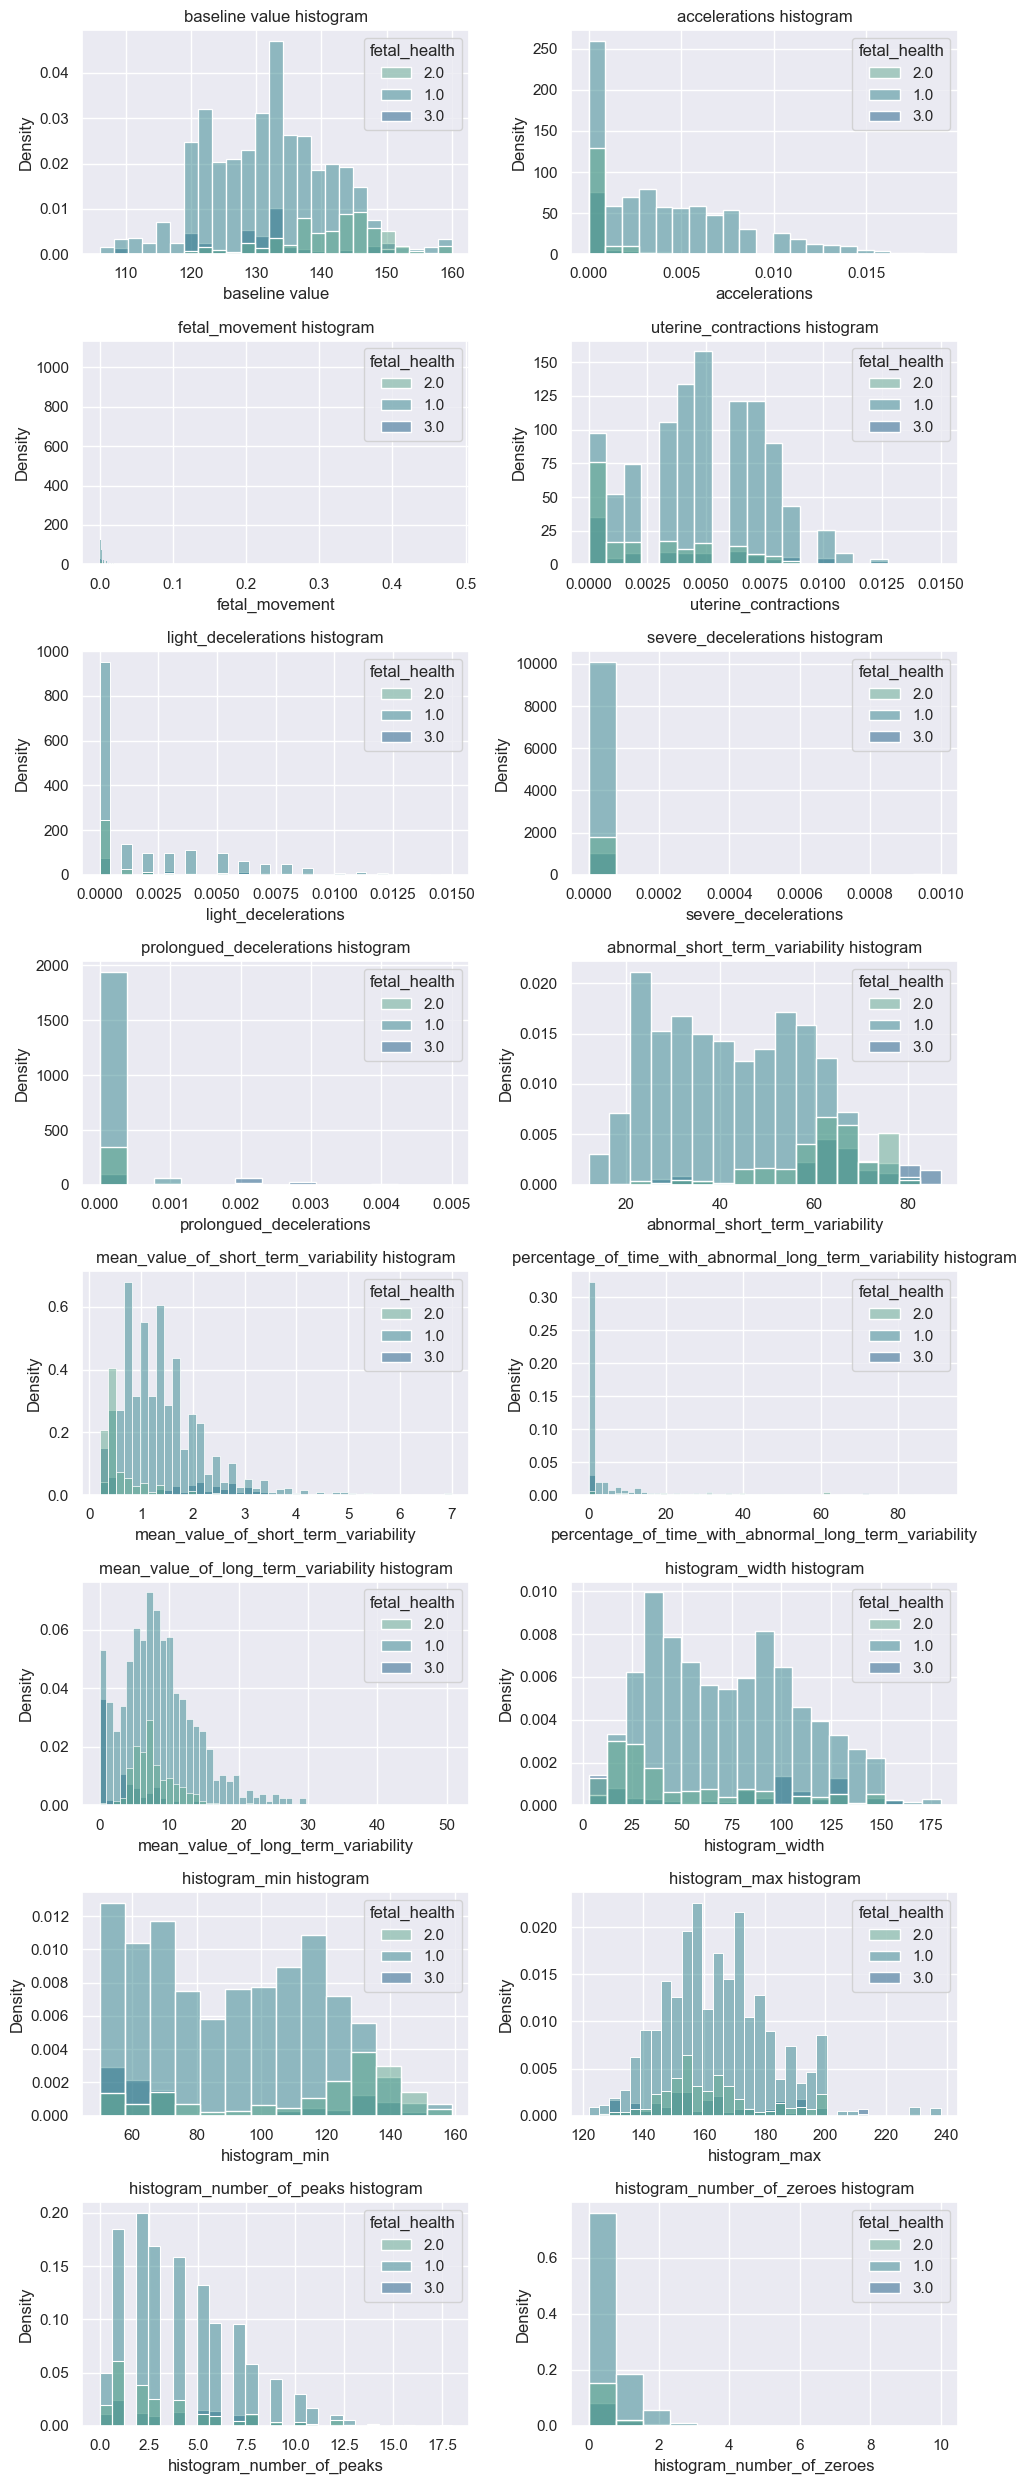

In [82]:
fig = plt.figure(figsize=(10,25))
axes = fig.subplots(8,2)
columns1 =fetal_health.columns.values
i=0
for raw in range(8):
    for col in range(2):
        sns.histplot(data=fetal_health,x=fetal_health[columns1[i]],stat='density',hue=fetal_health['fetal_health'],ax=axes[raw,col],palette='crest')
        axes[raw,col].set_title(f'{columns1[i]} histogram')
        i+=1
fig.tight_layout()
plt.show()

## Préparation des données

Utilisant les différentes fonctions de scikit-learn : 
- D'après votre analyse et visualisation des données, supprimez s'il le faut les features que vous jugez en trop
- Subdivisez les données en un ensemble d'entrainement et de test, prenez 30% du jeux de données pour le test, le reste sera pris pour l'entrainement.
- Appliquez une normalisation (s'il le faut) aux données d'entrainement ainsi qu'aux données de test

we dont delete any feature

In [85]:
features_fetal = fetal_health.copy()
etiq= features_fetal['fetal_health']
features_fetal.drop(['fetal_health'],axis=1,inplace=True)
features_fetal.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                               43.0       ...   
1                                                0.0       ...   
2                                                0.0       ...   
3                                                0.0       ...   
4                                                0.0       ...   

   histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
0             64.0           62.0          126.0                        2.0   
1            130.0           68.0          198.0                        6.0   
2            130.0           68.0          198.0                        5.0   
3            117.0           53.0          170.0                       11.0   
4            117.0           53.0          170.0                        9.0   

   histogram_number_of_zeroes  histogram_mode  histogram_mean  \
0                         0.0           120.0           137.0   
1                         1.0           141.0           136.0   
2                         1.0           141.0           135.0   
3                         0.0           137.0           134.0   
4                         0.0           137.0           136.0   

   histogram_median  histogram_variance  histogram_tendency  
0             121.0                73.0                 1.0  
1             140.0                12.0                 0.0  
2             138.0                13.0                 0.0  
3             137.0                13.0                 1.0  
4             138.0                11.0                 1.0  

[5 rows x 21 columns]

In [86]:
etiq.value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

subdivision of data :(without normalisation)

In [99]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(features_fetal, etiq, test_size=0.3,random_state=23)

normalisation :

In [91]:
features_fetal_scaled = StandardScaler().fit_transform(features_fetal)
features_fetal_scaled =pd.DataFrame(features_fetal_scaled,columns=list(features_fetal.columns))
features_fetal_scaled.head()


baseline value  accelerations  fetal_movement  uterine_contractions  \
0       -1.352220      -0.822388        -0.20321             -1.482465   
1       -0.132526       0.730133        -0.20321              0.554627   
2       -0.030884      -0.046128        -0.20321              1.233657   
3        0.070757      -0.046128        -0.20321              1.233657   
4       -0.132526       0.988886        -0.20321              1.233657   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0            -0.638438             -0.057476                 -0.268754   
1             0.375243             -0.057476                 -0.268754   
2             0.375243             -0.057476                 -0.268754   
3             0.375243             -0.057476                 -0.268754   
4            -0.638438             -0.057476                 -0.268754   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                         1.513190                             -0.943095   
1                        -1.744751                              0.868841   
2                        -1.802928                              0.868841   
3                        -1.802928                              1.208579   
4                        -1.802928                              1.208579   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                           1.802542       ...   
1                                          -0.535361       ...   
2                                          -0.535361       ...   
3                                          -0.535361       ...   
4                                          -0.535361       ...   

   histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
0        -0.165507      -1.068562      -2.119592                  -0.701397   
1         1.529124      -0.865539       1.893794                   0.655137   
2         1.529124      -0.865539       1.893794                   0.316003   
3         1.195333      -1.373097       0.333033                   2.350804   
4         1.195333      -1.373097       0.333033                   1.672537   

   histogram_number_of_zeroes  histogram_mode  histogram_mean  \
0                   -0.458444       -1.065614        0.153270   
1                    0.958201        0.216638        0.089126   
2                    0.958201        0.216638        0.024982   
3                   -0.458444       -0.027600       -0.039162   
4                   -0.458444       -0.027600        0.089126   

   histogram_median  histogram_variance  histogram_tendency  
0         -1.181642            1.870569            1.112980  
1          0.132038           -0.234998           -0.524526  
2         -0.006244           -0.200481           -0.524526  
3         -0.075385           -0.200481            1.112980  
4         -0.006244           -0.269516            1.112980  

[5 rows x 21 columns]

subdivision of data : (with normalisation)

In [93]:
fv_train_scaled, fv_test_scaled, etiq_train, etiq_test = train_test_split(features_fetal_scaled, etiq, test_size=0.3,random_state=23)

In [101]:
fv_train.shape

(1488, 21)

## Application des modèles

Utilisant scikit-learn :
- Appliquez les modèles que vous avez sélectionné pour la classification de ces données
- Evaluez les performances des modèles utilisant : l'accuracy, f1-score
- Utilisez GridSearchCV pour sélectionner les meilleurs paramètres pour vos différents modèles
- Indiquez pour chaque modèle sélectionné quelle est la meilleure combinaison de paramètres
- Indiquez pour chaque modèle sélectionné les performances (en terme de métrique) maximales atteintes.

## Bonus

Pour aller plus loin : 
- Features engineering
    - Etudiez les techniques de sélection de caractéristiques (features selection) : [Source intéressante](https://machinelearningmastery.com/calculate-feature-importance-with-python/)
    - Garder les features les plus importantes utilisant les techniques précédemment présentées (choisissez le nombre de caractéristiques sélectionnées que vous voulez)
    - Evaluez le modèle avec ce nombre de features et analysez s'il gagne ou perd en performances
- Dimensionality reduction
    - Etudiez l'analyse en composantes principales (PCA) : [Source](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)
    - Appliquez la PCA utilisant scikit-learn
    - Appliquez la PCA pour garder les 2 composantes principales et faites une visualisation (scatter plot) de vos données en mettant une couleur par classes et analysez la facilité (ou difficulté) de classification
    - Sélectionner un nombre de composantes principales permettant d'avoir au moins 90% de la variance globale du jeux de données initial
    - Appliquez à nouveau les modèles que vous avez sélectionnés et analysez les performances atteintes via cette technique

In [ ]:
from sklearn.decomposition import PCA